In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')   
dataset.drop(dataset.index[dataset['game'] == 'Divided'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Selective'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
display(dataset)

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
0,1,2,4,19,18,0,1,1479,57000,No,94.736842,5.263158,0.000000,Alternating
1,2,1,4,19,19,0,0,1605,57000,No,100.000000,0.000000,0.000000,Alternating
2,3,2,4,19,18,3,1,1404,57000,No,94.736842,5.263158,15.789474,Alternating
3,4,2,4,19,19,4,0,1782,57000,No,100.000000,0.000000,21.052632,Alternating
4,5,2,4,19,19,6,0,1258,57000,No,100.000000,0.000000,31.578947,Alternating
5,6,1,4,19,15,5,4,1043,57000,No,78.947368,21.052632,26.315789,Alternating
6,7,1,4,19,19,3,0,1267,57000,No,100.000000,0.000000,15.789474,Alternating
7,8,1,4,19,15,0,4,1439,57000,No,78.947368,21.052632,0.000000,Alternating
8,9,1,4,19,18,0,1,1614,57000,No,94.736842,5.263158,0.000000,Alternating
9,10,1,4,19,13,2,6,1540,57000,No,68.421053,31.578947,10.526316,Alternating


In [3]:
# extracting only 11-comission & 12-omission
x = dataset.iloc[:, [7, 10, 11, 12]].values  
display(x)

array([[1479.        ,   94.73684211,    5.26315789,    0.        ],
       [1605.        ,  100.        ,    0.        ,    0.        ],
       [1404.        ,   94.73684211,    5.26315789,   15.78947368],
       [1782.        ,  100.        ,    0.        ,   21.05263158],
       [1258.        ,  100.        ,    0.        ,   31.57894737],
       [1043.        ,   78.94736842,   21.05263158,   26.31578947],
       [1267.        ,  100.        ,    0.        ,   15.78947368],
       [1439.        ,   78.94736842,   21.05263158,    0.        ],
       [1614.        ,   94.73684211,    5.26315789,    0.        ],
       [1540.        ,   68.42105263,   31.57894737,   10.52631579],
       [1076.        ,  100.        ,    0.        ,    0.        ],
       [1144.        ,  100.        ,    0.        ,   10.52631579],
       [1366.        ,   94.73684211,    5.26315789,    0.        ],
       [1525.        ,   89.47368421,   10.52631579,   10.52631579],
       [1146.        ,  100.      

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)


array([[ 1.03728438,  0.03304995, -0.03304995, -0.92445879],
       [ 1.46645129,  0.677524  , -0.677524  , -0.92445879],
       [ 0.78182788,  0.03304995, -0.03304995, -0.16275683],
       [ 2.06932863,  0.677524  , -0.677524  ,  0.09114382],
       [ 0.28453924,  0.677524  , -0.677524  ,  0.59894513],
       [-0.44776939, -1.90037221,  1.90037221,  0.34504448],
       [ 0.31519402,  0.677524  , -0.677524  , -0.16275683],
       [ 0.90104091, -1.90037221,  1.90037221, -0.92445879],
       [ 1.49710607,  0.03304995, -0.03304995, -0.92445879],
       [ 1.24505566, -3.18932031,  3.18932031, -0.41665748],
       [-0.33536853,  0.677524  , -0.677524  , -0.92445879],
       [-0.10375464,  0.677524  , -0.677524  , -0.41665748],
       [ 0.65239659,  0.03304995, -0.03304995, -0.92445879],
       [ 1.19396436, -0.6114241 ,  0.6114241 , -0.41665748],
       [-0.09694247,  0.677524  , -0.677524  , -0.92445879],
       [-0.13440942,  0.677524  , -0.677524  , -0.92445879],
       [ 0.03589491,  0.

In [5]:
x = dataset.iloc[:, [2, 7, 10, 11, 12]].copy()
x[['mean_reaction_time', 'percentage_no_of_correct_responses', 'oer', 'cer']] = new_df
x.head()
x = x.to_numpy()
display(x)


array([[ 4.        ,  1.03728438,  0.03304995, -0.03304995, -0.92445879],
       [ 4.        ,  1.46645129,  0.677524  , -0.677524  , -0.92445879],
       [ 4.        ,  0.78182788,  0.03304995, -0.03304995, -0.16275683],
       [ 4.        ,  2.06932863,  0.677524  , -0.677524  ,  0.09114382],
       [ 4.        ,  0.28453924,  0.677524  , -0.677524  ,  0.59894513],
       [ 4.        , -0.44776939, -1.90037221,  1.90037221,  0.34504448],
       [ 4.        ,  0.31519402,  0.677524  , -0.677524  , -0.16275683],
       [ 4.        ,  0.90104091, -1.90037221,  1.90037221, -0.92445879],
       [ 4.        ,  1.49710607,  0.03304995, -0.03304995, -0.92445879],
       [ 4.        ,  1.24505566, -3.18932031,  3.18932031, -0.41665748],
       [ 4.        , -0.33536853,  0.677524  , -0.677524  , -0.92445879],
       [ 5.        , -0.10375464,  0.677524  , -0.677524  , -0.41665748],
       [ 5.        ,  0.65239659,  0.03304995, -0.03304995, -0.92445879],
       [ 5.        ,  1.19396436, -0.6

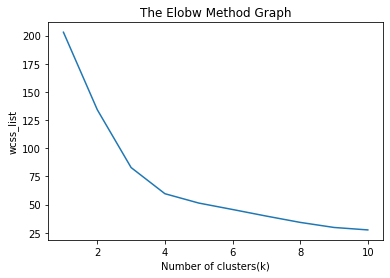

In [6]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [7]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

'''
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of children')  
mtp.xlabel('Commission Errors')  
mtp.ylabel('Omission Errors')  
mtp.legend()  
mtp.show()  
'''

[0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 1 1 2 2 3 3 1 1 1 3 1 1 3 1 1 1 3 3 3
 3 3]


"\n#visulaizing the clusters  \nmtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  \nmtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  \nmtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    \nmtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   \nmtp.title('Clusters of children')  \nmtp.xlabel('Commission Errors')  \nmtp.ylabel('Omission Errors')  \nmtp.legend()  \nmtp.show()  \n"

In [ ]:
# save the model to disk
filename = 'modelaa.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [8]:
new_df = dataset.iloc[:, [2, 7, 10, 11, 12]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
0,4,1479,94.736842,5.263158,0.000000,0
1,4,1605,100.000000,0.000000,0.000000,0
2,4,1404,94.736842,5.263158,15.789474,0
3,4,1782,100.000000,0.000000,21.052632,0
4,4,1258,100.000000,0.000000,31.578947,0
5,4,1043,78.947368,21.052632,26.315789,2
6,4,1267,100.000000,0.000000,15.789474,0
7,4,1439,78.947368,21.052632,0.000000,2
8,4,1614,94.736842,5.263158,0.000000,0
9,4,1540,68.421053,31.578947,10.526316,2


# Cluster Analysis

## Cluster 1

In [9]:
len(new_df[new_df["clusters"] == 0])

15

In [10]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)
# cluster_0.boxplot(column =['CER'], grid = False)
# cluster_0.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
0,4,1479,94.736842,5.263158,0.000000,0
1,4,1605,100.000000,0.000000,0.000000,0
2,4,1404,94.736842,5.263158,15.789474,0
3,4,1782,100.000000,0.000000,21.052632,0
4,4,1258,100.000000,0.000000,31.578947,0
6,4,1267,100.000000,0.000000,15.789474,0
8,4,1614,94.736842,5.263158,0.000000,0
10,4,1076,100.000000,0.000000,0.000000,0
11,5,1144,100.000000,0.000000,10.526316,0
12,5,1366,94.736842,5.263158,0.000000,0


In [11]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['mean_reaction_time'].max()
minVal = cluster_0['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_0['percentage_no_of_correct_responses'].max()
minVal = cluster_0['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_0['oer'].max()
minVal = cluster_0['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_0['cer'].max()
minVal = cluster_0['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  1076
mean_reaction_time max -  1782

percentage_no_of_correct_responses min -  89.47368421
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  10.52631579

cer min -  0.0
cer max -  31.57894737


## Cluster 2

In [12]:
len(new_df[new_df["clusters"] == 1])

10

In [13]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)
#cluster_1.boxplot(column =['CER'], grid = False)
#cluster_1.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
18,5,912,100.000000,0.000000,26.315789,1
19,5,823,100.000000,0.000000,57.894737,1
24,6,961,100.000000,0.000000,52.631579,1
25,6,804,100.000000,0.000000,42.105263,1
26,6,1180,100.000000,0.000000,57.894737,1
28,6,448,94.736842,5.263158,15.789474,1
29,6,733,94.736842,5.263158,36.842105,1
31,7,771,100.000000,0.000000,78.947368,1
32,7,668,94.736842,5.263158,47.368421,1
33,7,838,89.473684,10.526316,47.368421,1


In [14]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['mean_reaction_time'].max()
minVal = cluster_1['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_1['percentage_no_of_correct_responses'].max()
minVal = cluster_1['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_1['oer'].max()
minVal = cluster_1['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

print()

maxVal = cluster_1['cer'].max()
minVal = cluster_1['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  448
mean_reaction_time max -  1180

percentage_no_of_correct_responses min -  89.47368421
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  10.52631579

cer min -  15.78947368
cer max -  78.94736842


## Cluster 3

In [15]:
len(new_df[new_df["clusters"] == 2])

5

In [16]:
cluster_2 = new_df[new_df["clusters"] == 2 ]
display(cluster_2)
#cluster_2.boxplot(column =['CER'], grid = False)
#cluster_2.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
5,4,1043,78.947368,21.052632,26.315789,2
7,4,1439,78.947368,21.052632,0.000000,2
9,4,1540,68.421053,31.578947,10.526316,2
20,5,1506,84.210526,15.789474,10.526316,2
21,5,1489,68.421053,31.578947,47.368421,2


In [17]:
cluster_2 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_2['mean_reaction_time'].max()
minVal = cluster_2['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_2['percentage_no_of_correct_responses'].max()
minVal = cluster_2['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_2['oer'].max()
minVal = cluster_2['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

print()

maxVal = cluster_2['cer'].max()
minVal = cluster_2['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  1043
mean_reaction_time max -  1540

percentage_no_of_correct_responses min -  68.42105263
percentage_no_of_correct_responses max -  84.21052632

oer min -  15.78947368
oer max -  31.57894737

cer min -  0.0
cer max -  47.36842105


## Cluster 4

In [18]:
len(new_df[new_df["clusters"] == 3])

9

In [19]:
cluster_3 = new_df[new_df["clusters"] == 3 ]
display(cluster_3)
#cluster_2.boxplot(column =['CER'], grid = False)
#cluster_2.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
22,6,1023,100.000000,0.000000,0.000000,3
23,6,1397,100.000000,0.000000,0.000000,3
27,6,994,94.736842,5.263158,10.526316,3
30,6,1083,94.736842,5.263158,26.315789,3
34,7,1338,100.000000,0.000000,0.000000,3
35,7,1106,100.000000,0.000000,0.000000,3
36,7,987,94.736842,5.263158,5.263158,3
37,7,1181,89.473684,10.526316,10.526316,3
38,7,1179,100.000000,0.000000,0.000000,3


In [20]:
cluster_3 = new_df[new_df["clusters"] == 3 ]

maxVal = cluster_3['mean_reaction_time'].max()
minVal = cluster_3['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_3['percentage_no_of_correct_responses'].max()
minVal = cluster_3['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_3['oer'].max()
minVal = cluster_3['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

print()

maxVal = cluster_3['cer'].max()
minVal = cluster_3['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  987
mean_reaction_time max -  1397

percentage_no_of_correct_responses min -  89.47368421
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  10.52631579

cer min -  0.0
cer max -  26.31578947


In [21]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['CER'], "Cluster2": cluster_1['CER'], "Cluster3": cluster_2['CER']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

KeyError: 'CER'

In [ ]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['OER'], "Cluster2": cluster_1['OER'], "Cluster3": cluster_2['OER']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()